In [1]:
# Import libraries here:
import pandas as pd
import numpy as np
import requests
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
games = pd.read_csv("dato.csv")

In [3]:
pwd

'/Users/Carlos/Desktop/Ironhack/REPOS/apis-project/Input'

In [4]:
# Sales are represented in millions (M)
games.head(7)

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating,Critic_Score_Class
0,Wii,Sports,Nintendo,"41,36","28,96","3,77","8,45","82,54",E,Bueno
1,Wii,Racing,Nintendo,"15,68","12,8","3,79","3,29","35,57",E,Excelente
2,Wii,Sports,Nintendo,"15,61","10,95","3,28","2,95","32,78",E,Excelente
3,DS,Platform,Nintendo,"11,28","9,15","6,5","2,88","29,81",E,Excelente
4,Wii,Misc,Nintendo,"13,96","9,18","2,93","2,84","28,92",E,Malo
5,Wii,Platform,Nintendo,"14,48","6,95","4,7","2,25","28,38",E,Excelente
6,DS,Racing,Nintendo,"9,71","7,48","4,13","1,9","23,22",E,Excelente


In [191]:
a = games.groupby(games["Platform"],sort=True)

In [192]:
a.head()

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating,Critic_Score_Class
0,Wii,Sports,Nintendo,"41,36","28,96","3,77","8,45","82,54",E,Bueno
1,Wii,Racing,Nintendo,"15,68","12,8","3,79","3,29","35,57",E,Excelente
2,Wii,Sports,Nintendo,"15,61","10,95","3,28","2,95","32,78",E,Excelente
3,DS,Platform,Nintendo,"11,28","9,15","6,5","2,88","29,81",E,Excelente
4,Wii,Misc,Nintendo,"13,96","9,18","2,93","2,84","28,92",E,Malo
...,...,...,...,...,...,...,...,...,...,...
1153,PSV,Role-Playing,Atlus,"0,37","0,24","0,38","0,16","1,14",M,Excelente
1217,DC,Sports,Sega,"1,02","0,05",0,"0,02","1,09",E,Excelente
2411,DC,Simulation,Sega,0,0,"0,52",0,"0,52",T,Excelente
3199,DC,Fighting,Namco Bandai Games,0,0,"0,34",0,"0,34",T,Excelente


In [7]:
import os
from dotenv import load_dotenv
load_dotenv()
user_key = os.getenv("apikey")

In [8]:
url = "https://api-v3.igdb.com/games/"
endpoint = ""

headers = {
    "user-key": user_key
}



In [9]:
#res = requests.get(f"https://api-v3.igdb.com/games?fields=name,age_ratings,rating",headers=headers)
res = requests.get(f"https://api.rawg.io/api/games")
data = res.json()
data

{'count': 443698,
 'next': 'https://api.rawg.io/api/games?page=2',
 'previous': None,
 'results': [{'id': 3498,
   'slug': 'grand-theft-auto-v',
   'name': 'Grand Theft Auto V',
   'released': '2013-09-17',
   'tba': False,
   'background_image': 'https://media.rawg.io/media/games/84d/84da2ac3fdfc6507807a1808595afb12.jpg',
   'rating': 4.48,
   'rating_top': 5,
   'ratings': [{'id': 5,
     'title': 'exceptional',
     'count': 2381,
     'percent': 59.26},
    {'id': 4, 'title': 'recommended', 'count': 1327, 'percent': 33.03},
    {'id': 3, 'title': 'meh', 'count': 243, 'percent': 6.05},
    {'id': 1, 'title': 'skip', 'count': 67, 'percent': 1.67}],
   'ratings_count': 3978,
   'reviews_text_count': 24,
   'added': 12855,
   'added_by_status': {'yet': 301,
    'owned': 7872,
    'beaten': 3267,
    'toplay': 371,
    'dropped': 582,
    'playing': 462},
   'metacritic': 97,
   'playtime': 68,
   'suggestions_count': 425,
   'user_game': None,
   'reviews_count': 4018,
   'saturated_co

In [114]:
enrich = pd.DataFrame(data["results"])
enrich = enrich[["id","name","rating"]]

In [11]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'html.parser')

In [12]:
soup

{"count":443698,"next":"https://api.rawg.io/api/games?page=2","previous":null,"results":[{"id":3498,"slug":"grand-theft-auto-v","name":"Grand Theft Auto V","released":"2013-09-17","tba":false,"background_image":"https://media.rawg.io/media/games/84d/84da2ac3fdfc6507807a1808595afb12.jpg","rating":4.48,"rating_top":5,"ratings":[{"id":5,"title":"exceptional","count":2381,"percent":59.26},{"id":4,"title":"recommended","count":1327,"percent":33.03},{"id":3,"title":"meh","count":243,"percent":6.05},{"id":1,"title":"skip","count":67,"percent":1.67}],"ratings_count":3978,"reviews_text_count":24,"added":12855,"added_by_status":{"yet":301,"owned":7872,"beaten":3267,"toplay":371,"dropped":582,"playing":462},"metacritic":97,"playtime":68,"suggestions_count":425,"user_game":null,"reviews_count":4018,"saturated_color":"0f0f0f","dominant_color":"0f0f0f","platforms":[{"platform":{"id":4,"name":"PC","slug":"pc","image":null,"year_end":null,"year_start":null,"games_count":256246,"image_background":"http

In [13]:
def searchbyRegion(a):
    a = input("Select a region:")
    return games[f"{a}_Sales"].value_counts()
    

In [14]:
games

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating,Critic_Score_Class
0,Wii,Sports,Nintendo,"41,36","28,96","3,77","8,45","82,54",E,Bueno
1,Wii,Racing,Nintendo,"15,68","12,8","3,79","3,29","35,57",E,Excelente
2,Wii,Sports,Nintendo,"15,61","10,95","3,28","2,95","32,78",E,Excelente
3,DS,Platform,Nintendo,"11,28","9,15","6,5","2,88","29,81",E,Excelente
4,Wii,Misc,Nintendo,"13,96","9,18","2,93","2,84","28,92",E,Malo
...,...,...,...,...,...,...,...,...,...,...
7107,PC,Action,Ubisoft,0,0,0,0,"0,01",T,Excelente
7108,PC,Shooter,Midway Games,0,0,0,0,"0,01",T,Aceptable
7109,PC,Sports,Sega,0,0,0,0,"0,01",E,Aceptable
7110,PC,Strategy,Take-Two Interactive,0,0,0,0,"0,01",E10+,Aceptable


In [15]:
rating = {"E10" : "Everyone +10",
          "M" :"Mature, 17 or older",
          "RP" : "Rating pending",
          "AO" : "Adults only, 18 or older",
          "T" : "Teen, 13 or older",
          "E" : "Everyone",
          "K-A" : "Kids to Adults: May be unsuitable for players under 6"}

In [16]:
rating.get("E10")

'Everyone +10'

In [17]:
def byrating(rat):
    return rating.get(f"{rat}")
    

In [18]:
byrating("T")

'Teen, 13 or older'

In [19]:
test = pd.concat([games,enrich],axis=1)

In [20]:
test

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating,Critic_Score_Class,name,rating
0,Wii,Sports,Nintendo,"41,36","28,96","3,77","8,45","82,54",E,Bueno,Grand Theft Auto V,4.48
1,Wii,Racing,Nintendo,"15,68","12,8","3,79","3,29","35,57",E,Excelente,Portal 2,4.62
2,Wii,Sports,Nintendo,"15,61","10,95","3,28","2,95","32,78",E,Excelente,The Witcher 3: Wild Hunt,4.68
3,DS,Platform,Nintendo,"11,28","9,15","6,5","2,88","29,81",E,Excelente,Tomb Raider (2013),4.06
4,Wii,Misc,Nintendo,"13,96","9,18","2,93","2,84","28,92",E,Malo,The Elder Scrolls V: Skyrim,4.42
...,...,...,...,...,...,...,...,...,...,...,...,...
7107,PC,Action,Ubisoft,0,0,0,0,"0,01",T,Excelente,NaN,NaN
7108,PC,Shooter,Midway Games,0,0,0,0,"0,01",T,Aceptable,NaN,NaN
7109,PC,Sports,Sega,0,0,0,0,"0,01",E,Aceptable,NaN,NaN
7110,PC,Strategy,Take-Two Interactive,0,0,0,0,"0,01",E10+,Aceptable,NaN,NaN


In [21]:
globall = games.groupby(by="Global_Sales",sort=False).min()

In [22]:
float(str(games["NA_Sales"])).mean()

ValueError: could not convert string to float: '0       41,36\n1       15,68\n2       15,61\n3       11,28\n4       13,96\n        ...  \n7107        0\n7108        0\n7109        0\n7110        0\n7111        0\nName: NA_Sales, Length: 7112, dtype: object'

In [ ]:
#games["NA_Sales","EU_Sales"]

In [29]:
test["NA_Sales"]= test["NA_Sales"].apply(lambda x: x.replace(",","."))
test["EU_Sales"]=test["EU_Sales"].apply(lambda x: x.replace(",","."))
test["JP_Sales"]=test["JP_Sales"].apply(lambda x: x.replace(",","."))
test["Other_Sales"]=test["Other_Sales"].apply(lambda x: x.replace(",","."))
test["Global_Sales"]=test["Global_Sales"].apply(lambda x: x.replace(",","."))

In [30]:
test

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating,Critic_Score_Class,name,rating
0,Wii,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,E,Bueno,Grand Theft Auto V,4.48
1,Wii,Racing,Nintendo,15.68,12.8,3.79,3.29,35.57,E,Excelente,Portal 2,4.62
2,Wii,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,E,Excelente,The Witcher 3: Wild Hunt,4.68
3,DS,Platform,Nintendo,11.28,9.15,6.5,2.88,29.81,E,Excelente,Tomb Raider (2013),4.06
4,Wii,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,E,Malo,The Elder Scrolls V: Skyrim,4.42
...,...,...,...,...,...,...,...,...,...,...,...,...
7107,PC,Action,Ubisoft,0,0,0,0,0.01,T,Excelente,NaN,NaN
7108,PC,Shooter,Midway Games,0,0,0,0,0.01,T,Aceptable,NaN,NaN
7109,PC,Sports,Sega,0,0,0,0,0.01,E,Aceptable,NaN,NaN
7110,PC,Strategy,Take-Two Interactive,0,0,0,0,0.01,E10+,Aceptable,NaN,NaN


In [31]:
test["NA_Sales"]=[float(x) for x in test["NA_Sales"]]
test["EU_Sales"]=[float(x) for x in test["EU_Sales"]]
test["JP_Sales"]=[float(x) for x in test["JP_Sales"]]
test["Other_Sales"]=[float(x) for x in test["Other_Sales"]]
test["Global_Sales"]=[float(x) for x in test["Global_Sales"]]

In [320]:
def regionsales(x):
    """
    This functios gives us the total sales of the three major gaming regions.
    Please enter the region inside a string, e.g regionsales("EU")
    Regions = "EU", "JP", "NA"
    """
    a =  test[f"{x}_Sales"].sum()
    print(f"{x} has a total of {a} sales (In Millions)")
    

In [321]:
regionsales("NA")
    

NA has a total of 2763.4900000000002 sales (In Millions)


In [43]:
def searchbyplatform(platform):
    return test.groupby(by=f"{platform}").min()

In [90]:
res = requests.get(f"https://api.rawg.io/api/games")
data = res.json()
data["results"][3]["released"]

'2013-03-05'

In [80]:
data

{'count': 443698,
 'next': 'https://api.rawg.io/api/games?page=2',
 'previous': None,
 'results': [{'id': 3498,
   'slug': 'grand-theft-auto-v',
   'name': 'Grand Theft Auto V',
   'released': '2013-09-17',
   'tba': False,
   'background_image': 'https://media.rawg.io/media/games/84d/84da2ac3fdfc6507807a1808595afb12.jpg',
   'rating': 4.48,
   'rating_top': 5,
   'ratings': [{'id': 5,
     'title': 'exceptional',
     'count': 2381,
     'percent': 59.26},
    {'id': 4, 'title': 'recommended', 'count': 1327, 'percent': 33.03},
    {'id': 3, 'title': 'meh', 'count': 243, 'percent': 6.05},
    {'id': 1, 'title': 'skip', 'count': 67, 'percent': 1.67}],
   'ratings_count': 3978,
   'reviews_text_count': 24,
   'added': 12855,
   'added_by_status': {'yet': 301,
    'owned': 7872,
    'beaten': 3267,
    'toplay': 371,
    'dropped': 582,
    'playing': 462},
   'metacritic': 97,
   'playtime': 68,
   'suggestions_count': 425,
   'user_game': None,
   'reviews_count': 4018,
   'saturated_co

In [137]:
def releasedate(x=3498):
    """
    Sacamos la fecha de lanzamiento según el juego
    """
    url= f"https://api.rawg.io/api/games/{x}"
    res = requests.get(url)
    result = res.json()
    print(result["name"])
    return result["released"]

In [304]:
enrich

,id,name,rating
0,3498,Grand Theft Auto V,4.48
1,4200,Portal 2,4.62
2,3328,The Witcher 3: Wild Hunt,4.68
3,5286,Tomb Raider (2013),4.06
4,5679,The Elder Scrolls V: Skyrim,4.42
5,12020,Left 4 Dead 2,4.10
6,802,Borderlands 2,4.05
7,4062,BioShock Infinite,4.39
8,13536,Portal,4.52
9,3439,Life is Strange,4.10


In [ ]:
def poke_num(x):
    '''
    Con esta funcion, cogemos en numero de un pokemon y sacamos su nombre y estadisticas
    '''
    data = opc.cleaning('input/pokemon.csv')
    results = api(x)
    x = int(x)
    name = data[(data["#"]== x)]
    nombre = name['Name'].values[0]
    print(f' El pokemon numero {x} es {nombre}')
    ataque = name['Attack'].values[0].round(2)
    print(f'     Su ataque es de {ataque}')
    defensa = name['Defense'].values[0].round(2)
    print(f'     Su defensa es de {defensa}')
    velocidad =name['Speed'].values[0]
    print(f'     Tiene una velocidad de {velocidad}')
    tipo =name['Type 1'].values[0]
    print(f'     Es un pokemon de tipo {tipo}')
    peso = results["weight"]
    altura = results["height"]
    print(f'     Este pokemon mide {altura} cm')
    print(f'     Tiene un peso de {peso} gramos')
    return 

In [194]:
def gamestatistics(x):
    """
    This function returns the statistics of a certain game.
    You have to insert the ID number of this game
    """
    result = apis(x)
    rating = result["rating"]
    name = result["name"]
    print(f"{name} has a rating of {rating}")
    website=result["website"]
    print(f"In order to visit the website, enter the following link {website}")
    
    
    

In [150]:
def apis(x):
    """
    This function is to automatize the request to the API
    """
    url=f"https://api.rawg.io/api/games/{x}"
    response = requests.get(url)
    results= response.json()
    return results

In [153]:
apis(3498)["name"]

'Grand Theft Auto V'

In [195]:
gamestatistics(3498)

Grand Theft Auto V has a rating of 4.48
In order to visit the website, enter the following link http://www.rockstargames.com/V/


In [299]:
def platforms(idnumber):
    """
    This function returns specifications for each console, the id number can be found in the list below:
    [PS2 = 15; X360 = 14; PS3 = 16; X= 180; Wii = 11; DS = 9; PSP = 17; PS4 = 18; GBA = 24; XONE= 1; 3DS= 8;
    PS = 27; PSV= 19; WiiU= 10]
    """
    res = requests.get(f"https://api.rawg.io/api/platforms/{idnumber}")
    results = res.json()
    name = results["name"]
    print(f"The name of the platform is {name}")
    games = results["games_count"]
    print(f"The total games on this platform is {games}")
    desc = results["description"]
    a = input("Do you want a description of this platform? (Y/N)")
    if a == "Y":
        print(f"{desc}")
    else:
        pass
    

In [286]:
res = requests.get(f"https://api.rawg.io/api/platforms/18")
data = res.json()
data

{'id': 18,
 'name': 'PlayStation 4',
 'slug': 'playstation4',
 'games_count': 5081,
 'image_background': 'https://media.rawg.io/media/games/709/709bf81f874ce5d25d625b37b014cb63.jpg',
 'description': '<p>PlayStation 4 is a home video game console launched in 2013 by Sony. There are currently three versions of the hardware variations: original console (also called &quot;fat&quot;); a slim version with optical audio output removed, weight and size reduced as well as USB interfaces differently placed; and Pro version with 4k and HDR support added and PS VR functions improved. PS4 supports VR with the special helmet called PS VR. The starting game lineup of the system is considered to be a one of the most successful in history. The console maintains the status of an exclusive-oriented platform with many remasters and Playstation-only games. Together with the start of the system, there was a multiplayer requirement introduced — now everyone seeking to play via PlayStation Network must have P

In [231]:
test["Platform"].value_counts()

PS2     1169
X360     888
PS3      790
PC       734
X        586
Wii      493
DS       472
PSP      401
GC       363
PS4      255
GBA      249
XOne     169
3DS      161
PS       154
PSV      125
WiiU      89
DC        14
Name: Platform, dtype: int64

In [301]:
platforms(15)

The name of the platform is PlayStation 2
The total games on this platform is 1830
Do you want a description of this platform? (Y/N)Y
<p>PlayStation 2 is the sixth generation video game console developed by Sony and released in 2000. There were two primary revisions — the original and &quot;slim&quot; one. They do not differ much except for the size. PS2 is regarded as the best-selling video game system of all times as there were sold a total of 155 million systems worldwide. There are numerous exclusive series originated in PS2 and continued their path onward to the further platforms: God of War, Killzone,  Ratchet &amp; Clank, Jak and Daxter and many more. This explains the production timeline of the console — the last one was released in 2013. So PS2 remained up-to-date even 7 years after the release of its successor. Unlike PS1 the console supported a wide variety of controllers such as fishing rods and guns as well as dance pads and guitars for rhythm-games. It is also the first k

In [ ]:
def graficos():
    '''
    Con esta funcion, importamos graficos agrupados por generaciones y los imprimimos.
    '''
    from PIL import Image
    data = opc.cleaning('input/pokemon.csv')  
    print(f'Por si te interesa, los datos estadisticos agrupados por generaciones son: ')
    total_gen= data.groupby("Generation").agg({"Attack":"mean", "Defense":"mean",
    }).plot.line()
    plt.title('Media de ataque y defensa por generacion')
    plt.savefig("output/Meanattack.jpg", bbox_inches='tight')
    max_gen = data.groupby("Generation").agg({"Attack":"max", "Defense":"max",
    }).plot.bar()
    plt.title('Ataques y defensas mas altos de cada generación')
    plt.savefig("output/Maxattack.jpg", bbox_inches='tight')
    min_gen = data.groupby("Generation").agg({"Attack":"min", "Defense":"min",}).plot.barh()
    plt.title('Ataques y defensas mas bajos de cada generacion')
    plt.savefig("output/Minattack.jpg", bbox_inches='tight')                                                                              
    img = Image.open('output/Meanattack.jpg')
    img.show() 
    img2 = Image.open('output/Minattack.jpg')
    img2.show() 
    img3 = Image.open('output/Maxattack.jpg')
    img3.show()

In [326]:
test

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating,Critic_Score_Class,name,rating
0,Wii,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,E,Bueno,Grand Theft Auto V,4.48
1,Wii,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,E,Excelente,Portal 2,4.62
2,Wii,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,E,Excelente,The Witcher 3: Wild Hunt,4.68
3,DS,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,E,Excelente,Tomb Raider (2013),4.06
4,Wii,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,E,Malo,The Elder Scrolls V: Skyrim,4.42
...,...,...,...,...,...,...,...,...,...,...,...,...
7107,PC,Action,Ubisoft,0.00,0.00,0.00,0.00,0.01,T,Excelente,NaN,NaN
7108,PC,Shooter,Midway Games,0.00,0.00,0.00,0.00,0.01,T,Aceptable,NaN,NaN
7109,PC,Sports,Sega,0.00,0.00,0.00,0.00,0.01,E,Aceptable,NaN,NaN
7110,PC,Strategy,Take-Two Interactive,0.00,0.00,0.00,0.00,0.01,E10+,Aceptable,NaN,NaN


In [343]:
a = test[["Platform","NA_Sales","EU_Sales","JP_Sales"]].head(1)

<AxesSubplot:>

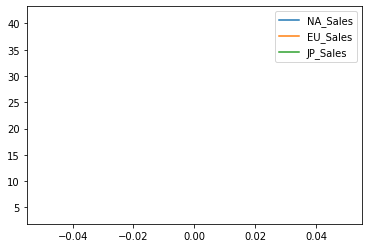

In [344]:
a.plot()

In [342]:
b = test["NA_Sales"].mean()
c = test["NA_Sales"].mean()
d = test["NA_Sales"].mean()


0.38856721034870645

In [341]:
.plot.bar()

AttributeError: 'numpy.float64' object has no attribute 'plot'

In [345]:
test[["Platform","NA_Sales","EU_Sales","JP_Sales"]]

,Platform,NA_Sales,EU_Sales,JP_Sales
0,Wii,41.36,28.96,3.77
1,Wii,15.68,12.80,3.79
2,Wii,15.61,10.95,3.28
3,DS,11.28,9.15,6.50
4,Wii,13.96,9.18,2.93
...,...,...,...,...
7107,PC,0.00,0.00,0.00
7108,PC,0.00,0.00,0.00
7109,PC,0.00,0.00,0.00
7110,PC,0.00,0.00,0.00


In [376]:
na = test.groupby(by="Platform").agg({"NA_Sales":"sum"})

Text(0.5, 1.0, 'North America sales per platform (In millions)')

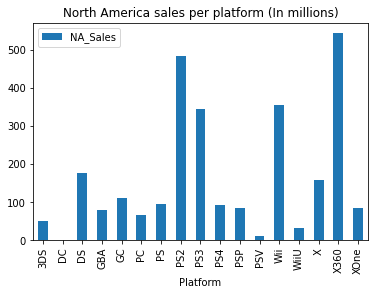

In [398]:
plot1 = na.plot.bar()
plt.title("North America sales per platform (In millions)")


Text(0.5, 1.0, 'Global sales per platform (In millions)')

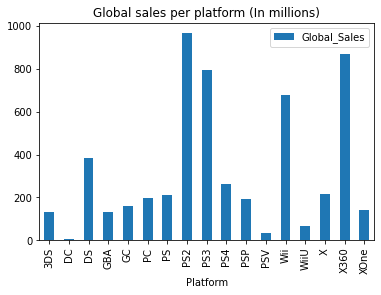

In [400]:
gl = test.groupby(by="Platform").agg({"Global_Sales":"sum"})
plot2 = gl.plot.bar()
plt.title("Global sales per platform (In millions)")


<AxesSubplot:>

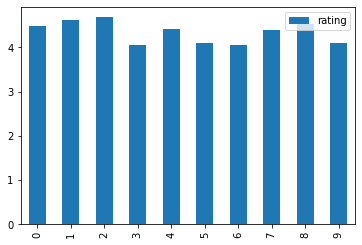

In [395]:
games = enrich[["name","rating"]].head(10)
games.plot.bar()

<AxesSubplot:ylabel='Platform'>

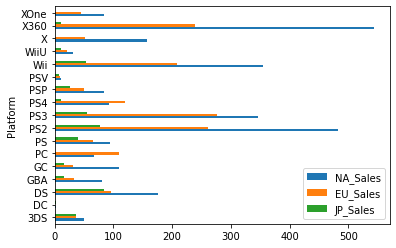

In [393]:
z = test.groupby(by="Platform").agg({"NA_Sales":"sum","EU_Sales":"sum","JP_Sales":"sum"})
z.plot.barh()

In [396]:
img = Image.open('output/Meanattack.jpg')
img.show() 
img2 = Image.open('output/Minattack.jpg')
img2.show() 

NameError: name 'Image' is not defined

In [405]:
nas = test["NA_Sales"].mean()
eus = test["EU_Sales"].mean()
jps = test["JP_Sales"].mean()
print(f"The average sales (in millions) for North America is {nas}")
print(f"The average sales (in millions) for Europe is {eus}")
print(f"The average sales (in millions) for Japan is {jps}")

The average sales (in millions) for North America is 0.38856721034870645
The average sales (in millions) for Europe is 0.23253655793025874
The average sales (in millions) for Japan is 0.06265185601799775


In [408]:
jps

0.06265185601799775